In [158]:
# Etapa 1 — Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [160]:
# 📥 Carregamento inicial do dataset
df = pd.read_csv("dataset_produtividade_guarana.csv", sep=';', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ano                                40 non-null     int64  
 1   chuva_durante_floração_mm          40 non-null     float64
 2   chuva_durante_colheita_mm          40 non-null     float64
 3   chuva_total_anual_mm               40 non-null     float64
 4   anomalia_chuva_floração_mm         40 non-null     float64
 5   temperatura_média_floração_C       40 non-null     float64
 6   umidade_relativa_média_floração_%  40 non-null     float64
 7   evento_ENSO                        40 non-null     object 
 8   produtividade_kg_por_ha            40 non-null     int64  
 9   produtividade_safra                40 non-null     object 
dtypes: float64(6), int64(2), object(2)
memory usage: 3.3+ KB


In [162]:
# X -> múltiplas variáveis
X = df[['chuva_durante_floração_mm', 'chuva_durante_colheita_mm','chuva_total_anual_mm', 'temperatura_média_floração_C', 'anomalia_chuva_floração_mm', 'temperatura_média_floração_C', 'umidade_relativa_média_floração_%']]

# y -> Produtividade
y = df['produtividade_kg_por_ha']

X.head()

,chuva_durante_floração_mm,chuva_durante_colheita_mm,chuva_total_anual_mm,temperatura_média_floração_C,anomalia_chuva_floração_mm,temperatura_média_floração_C,umidade_relativa_média_floração_%
0,423.2,516.7,2459.8,26.16,93.4,26.16,84.25
1,363.0,540.0,2773.6,25.78,33.2,25.78,84.09
2,320.6,666.9,2694.5,25.46,-9.2,25.46,84.24
3,360.0,180.4,2165.2,26.91,30.2,26.91,86.56
4,419.4,693.8,2932.8,27.80,89.6,27.80,85.59


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

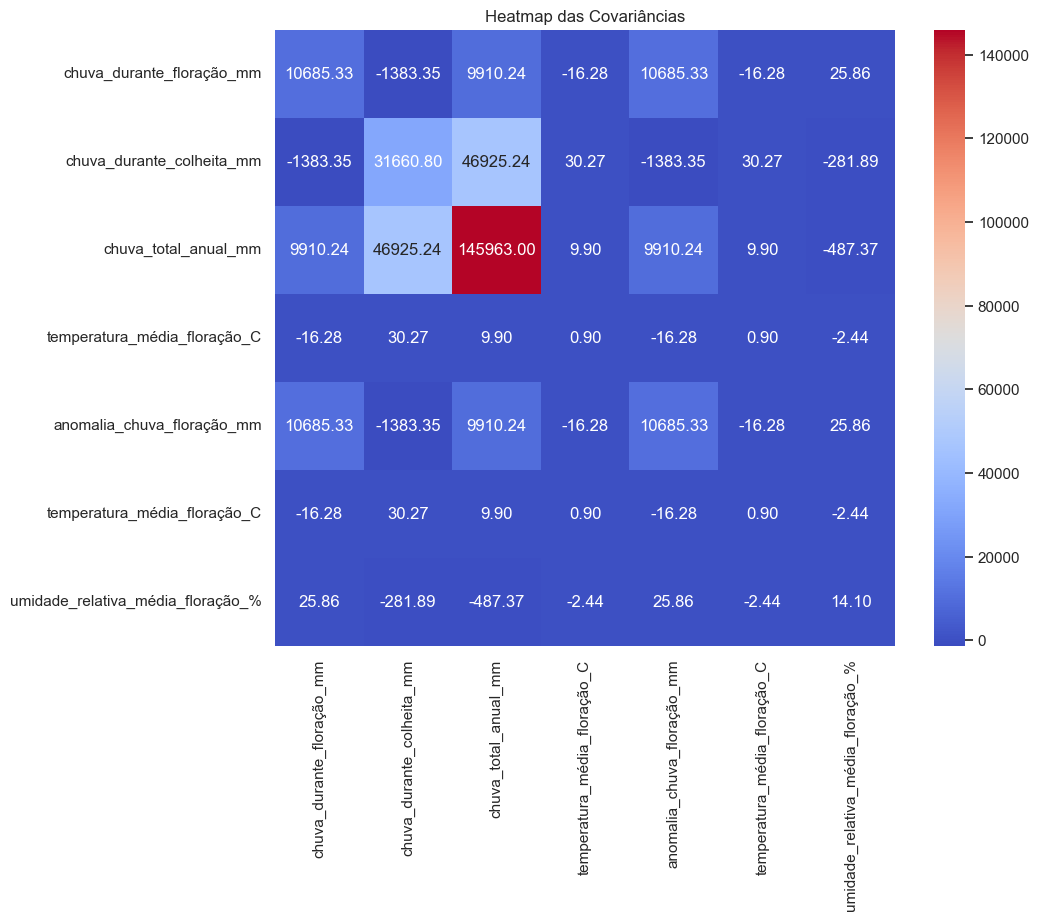

In [168]:
# Calcular a matriz de covariância
covariance_matrix = df[['chuva_durante_floração_mm', 'chuva_durante_colheita_mm','chuva_total_anual_mm', 'temperatura_média_floração_C', 'anomalia_chuva_floração_mm', 'temperatura_média_floração_C', 'umidade_relativa_média_floração_%']].cov()

# Criar o gráfico de heatmap das covariâncias
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap das Covariâncias')
plt.show()

In [170]:
#Agora iremos atribuir a variável produtividade para Y e as demais para X

Y = df['produtividade_kg_por_ha']
X = df[['chuva_durante_floração_mm', 'chuva_durante_colheita_mm','chuva_total_anual_mm', 'temperatura_média_floração_C', 'anomalia_chuva_floração_mm', 'temperatura_média_floração_C', 'umidade_relativa_média_floração_%']]

# Agora iremos adicionar uma constante ao modelo
X = sm.add_constant(X)

# Com o próprio stats model iremos criar o modelo de regressão linear
modelo = sm.OLS(Y, X).fit()
# Visualizando os resultados
print(modelo.summary())  

                               OLS Regression Results                              
Dep. Variable:     produtividade_kg_por_ha   R-squared:                       0.321
Model:                                 OLS   Adj. R-squared:                  0.221
Method:                      Least Squares   F-statistic:                     3.216
Date:                     Thu, 05 Jun 2025   Prob (F-statistic):             0.0175
Time:                             10:39:27   Log-Likelihood:                -218.99
No. Observations:                       40   AIC:                             450.0
Df Residuals:                           34   BIC:                             460.1
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

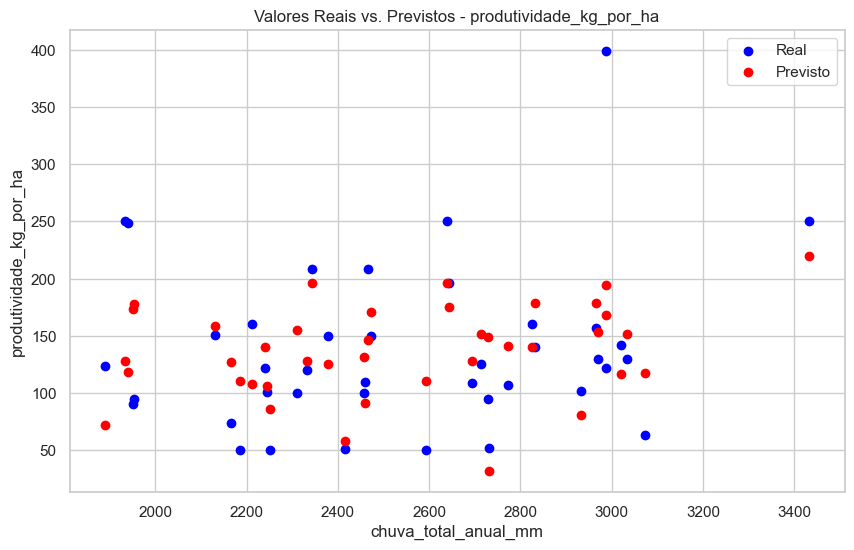

In [172]:
df['Y_previsto_statsmodels'] = modelo.predict(X)

# Plotando valores reais versus previstos
plt.figure(figsize=(10, 6))
plt.scatter(df['chuva_total_anual_mm'], df['produtividade_kg_por_ha'], label='Real', color='blue')
plt.scatter(df['chuva_total_anual_mm'], df['Y_previsto_statsmodels'], label='Previsto', color='red')
plt.title('Valores Reais vs. Previstos - produtividade_kg_por_ha')
plt.xlabel('chuva_total_anual_mm')
plt.ylabel('produtividade_kg_por_ha')
plt.legend()
plt.show()        

In [182]:
Y_previsto = df['Y_previsto_statsmodels']
Y_real = df['produtividade_kg_por_ha']

# Calcula o MAE (media de erro)
mae = mean_absolute_error(Y_real, Y_previsto)

print(f"MAE: {mae:.2f}")

MAE: 43.42


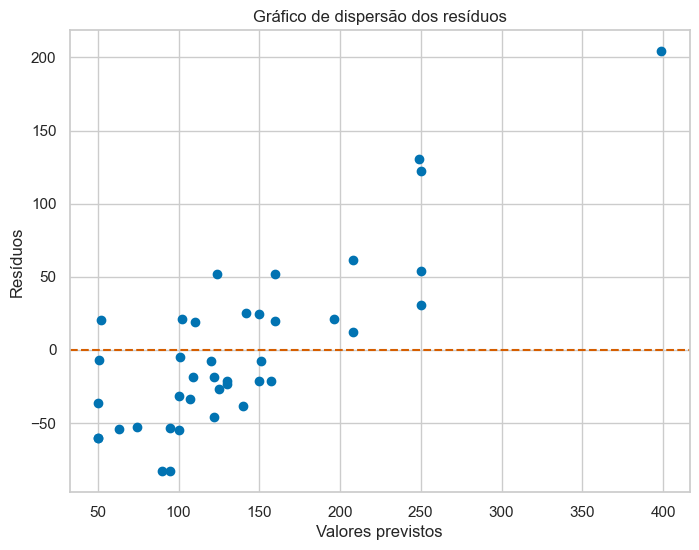

In [144]:
modelo = sm.OLS(df['produtividade_kg_por_ha'], sm.add_constant(df[['chuva_durante_floração_mm', 'chuva_durante_colheita_mm','chuva_total_anual_mm', 'temperatura_média_floração_C', 'anomalia_chuva_floração_mm', 'temperatura_média_floração_C', 'umidade_relativa_média_floração_%']])).fit()

# Calcular os resíduos
residuos = modelo.resid

# Visualizar os resíduos
# Gráfico de dispersão dos resíduos
plt.figure(figsize=(8, 6))
plt.scatter(df['produtividade_kg_por_ha'], residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de dispersão dos resíduos')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.show()

In [146]:
#variáveis de classificação
cat_col = df.select_dtypes(include= 'object')
for col in cat_col:
    print(f"{col} has {df[col].unique()}")

evento_ENSO has ['Neutro' 'El Niño' 'La Niña']
produtividade_safra has ['media' 'baixa' 'alta']


In [148]:
#Renomeação das colunas do dataset do csv para variáveis mais simples
df.rename(columns={
    'chuva_durante_floração_mm': 'chuva_flor',
    'chuva_durante_colheita_mm': 'chuva_colheita',
    'chuva_total_anual_mm': 'chuva_total',
    'anomalia_chuva_floração_mm': 'anomalia_flor',
    'temperatura_média_floração_C': 'temp_flor',
    'umidade_relativa_média_floração_%': 'umid_flor',
    'evento_ENSO': 'ENSO',
    'produtividade_kg_por_ha': 'produtividade',
    'produtividade_safra': 'safra'
}, inplace=True)

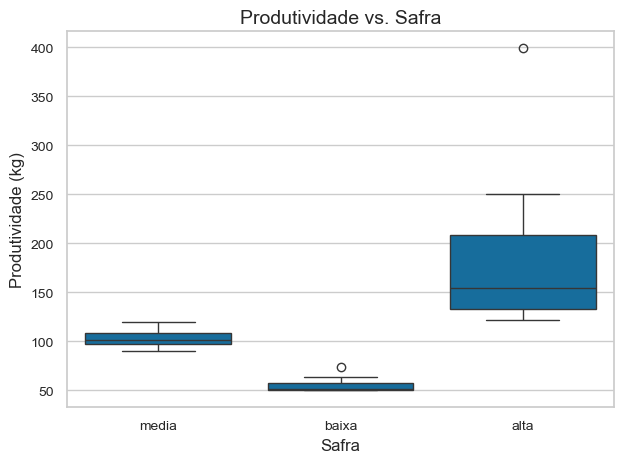

In [150]:
sns.boxplot(data=df, x='safra', y='produtividade')

plt.title('Produtividade vs. Safra', fontsize=14)
plt.xlabel('Safra', fontsize=12)
plt.ylabel('Produtividade (kg)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()